In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_std = pd.read_csv('./part/DF1sthypTOT')

In [4]:
del df_std['CountryCode']

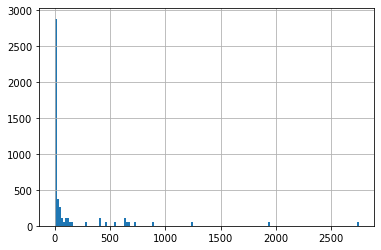

In [5]:
df_std = df_std[df_std['cnt'] > 0]
df_std['cnt'].hist(bins=150)

In [6]:
df_class = df_std.rename(columns={'cnt':'conto'})

In [7]:
df_class.groupby(by='conto').aggregate({'conto':'count'})

df_class['conto'] = df_class['conto'].apply(lambda x: 0 if (x > 0 and x < 5) else x)
df_class['conto'] = df_class['conto'].apply(lambda x: -1 if (x >= 5 and x < 15) else x)
df_class['conto'] = df_class['conto'].apply(lambda x: -2 if (x >= 15 and x < 40) else x)
df_class['conto'] = df_class['conto'].apply(lambda x: -3 if (x >= 40 and x < 120) else x)
df_class['conto'] = df_class['conto'].apply(lambda x: -4 if (x >= 120) else x)

df_class['conto'] = df_class['conto'].apply(lambda x: 1 if (x == -1) else x)
df_class['conto'] = df_class['conto'].apply(lambda x: 2 if (x == -2) else x)
df_class['conto'] = df_class['conto'].apply(lambda x: 3 if (x == -3) else x)
df_class['conto'] = df_class['conto'].apply(lambda x: 4 if (x == -4) else x)

df_class = df_class.rename(columns={'conto':'cnt'})

df_class

,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp,Density,cnt
0,1960,32.328512,4.000000e+07,739462.0,8255331.0,551.1210,604.5970,51.276,2.252607e+10,13.891572,4.0
1,1960,62.254366,6.200000e+07,493982.0,1114818.0,151.0588,160.4806,42.240,2.252607e+10,55.962154,0.0
2,1960,46.135122,1.451501e+09,3394205.0,7730687.0,323.2800,373.1320,49.671,2.252607e+10,4.670910,2.0
5,1960,65.215537,1.030000e+08,15177907.0,5441168.0,156.2470,255.1080,23.682,2.252607e+10,7.452076,0.0
6,1960,65.863463,1.451501e+09,957507.0,909889.0,136.9170,225.6710,36.696,2.252607e+10,62.664295,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9662,2013,75.175951,6.700000e+08,54284883.0,20725319.0,71.8134,143.5498,16.836,1.866257e+10,96.095470,4.0
9664,2013,57.767683,2.000000e+07,5645834.0,30927553.0,299.7320,359.4020,43.474,3.000756e+08,154.945717,1.0
9667,2013,68.227585,1.451501e+09,10953180.0,19290020.0,133.7868,238.2504,22.500,2.252607e+10,67.597675,0.0
9669,2013,74.074415,1.165000e+09,26913587.0,3362458.0,91.8990,197.1170,19.842,6.199698e+09,33.195598,0.0


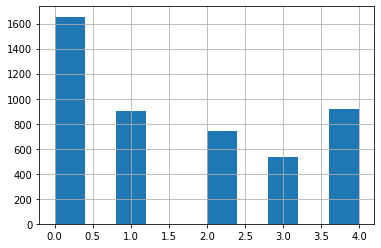

In [15]:
df_class.cnt.hist()

/home/andrea/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdde5466750>,
      dtype=object)

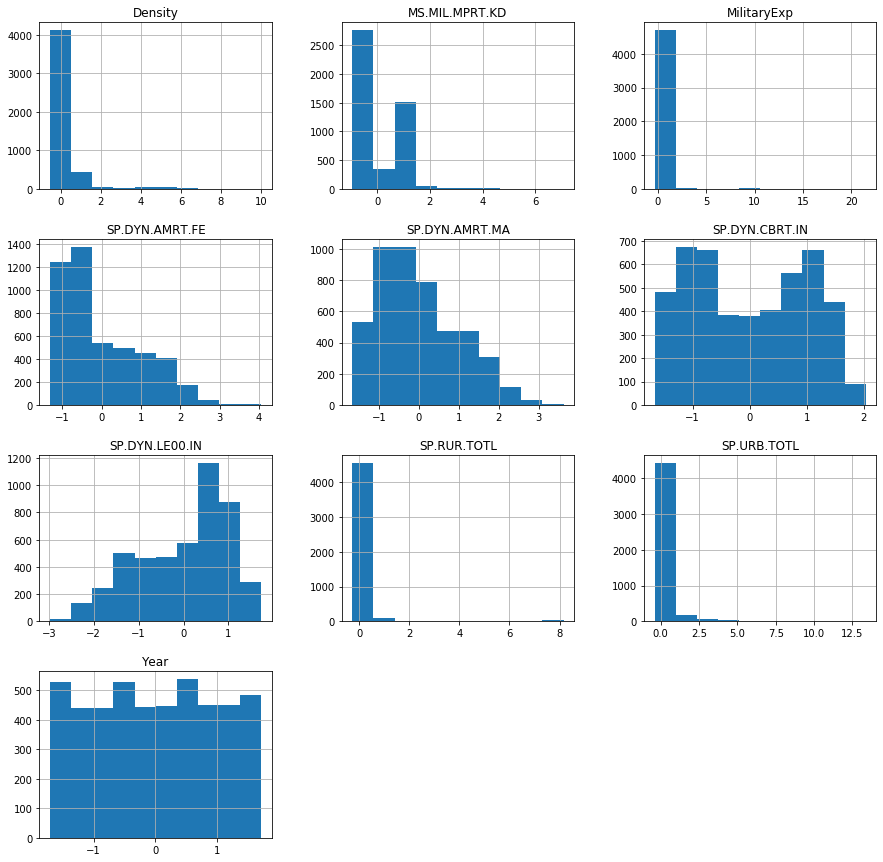

In [16]:
from sklearn.preprocessing import scale

feature_matrix=df_std.loc[:, df_std.columns != 'cnt']
target_vector=df_std['cnt']
feature_matrix = pd.DataFrame(scale(feature_matrix), index=feature_matrix.index, columns=feature_matrix.columns) # standardization
feature_matrix.hist(figsize=(15,15))



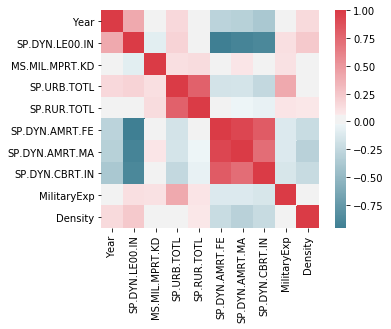

In [18]:
corr = feature_matrix.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True), square=True)

In [19]:
del feature_matrix['SP.URB.TOTL']
del feature_matrix['SP.DYN.AMRT.FE']
del feature_matrix['SP.DYN.AMRT.MA']

#tolti a causa della collinearità


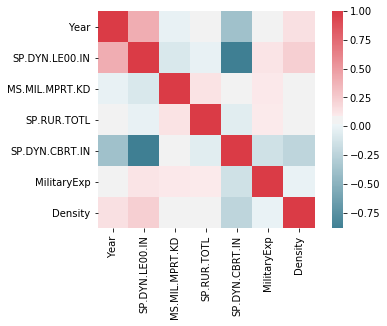

In [20]:
corr = feature_matrix.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True), square=True)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_matrix, target_vector, test_size=0.2, random_state=1)

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True,random_state=1, max_iter=10000, multi_class='multinomial',solver ='newton-cg').fit(x_train, y_train)
clf.predict(x_train)
print(clf.score(x_train,y_train))

clf.predict(x_test)
print(clf.score(x_test,y_test))

0.38184210526315787
0.3684210526315789


In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(random_state=1, max_iter=1000)
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
print('train accuracy: ', accuracy_score(y_train, y_pred_train))

y_pred_test = clf.predict(x_test)
print('test accuracy: ', accuracy_score(y_test, y_pred_test))


train accuracy:  0.9876315789473684
test accuracy:  0.9526315789473684


/home/andrea/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
